In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('StudentsPerformance.csv')

# Data Overview

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
from sklearn.preprocessing import LabelEncoder
df2 = df.copy()
lab_enc = LabelEncoder()
display(df.head(3))
df2['gender_lab'] = lab_enc.fit_transform(df2['gender'].values)
df2['tpc_lab'] = lab_enc.fit_transform(df2['test preparation course'].values)
print()
print('After transforming gender and test preparation course \n')
df2.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93



After transforming gender and test preparation course 



,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_lab,tpc_lab
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1
1,female,group C,some college,standard,completed,69,90,88,0,0
2,female,group B,master's degree,standard,none,90,95,93,0,1


In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df2.loc[:,['race/ethnicity']])
df_enc = pd.DataFrame(ohe.transform(df.loc[:, ['race/ethnicity']]).toarray(), columns=ohe.get_feature_names())
df_enc.head(5)

,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [6]:
ohe.fit(df2.loc[:, ['parental level of education']])
df_enc1 = pd.DataFrame(ohe.transform(df.loc[:, ['parental level of education']]).toarray(), columns=ohe.get_feature_names())
df_enc1.head(5)

,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df_transform = pd.concat([df2, df_enc, df_enc1], axis=1)
df_transform.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,gender_lab,tpc_lab,...,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df_ml=df_transform.drop(['lunch', 'parental level of education', 'test preparation course', 'race/ethnicity','gender'], axis=1)
df_ml.head()

,math score,reading score,writing score,gender_lab,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,72,72,74,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,69,90,88,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,90,95,93,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,57,44,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,76,78,75,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
X = df_ml.drop(['math score'], axis = 1)
y = df_ml['math score']
display(X.head(5))
display(y)

,reading score,writing score,gender_lab,tpc_lab,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,72,74,0,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,90,88,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,95,93,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,57,44,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,78,75,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [10]:
feature_importanc_Regression={}

In [11]:
def feature_importance(mod,importance):
    maximum=max(importance)
    for i,v in enumerate(importance):
        if v==maximum:
            feature_importanc_Regression[mod]=(i,v)
    return()

Feature: 0, Score: 0.23052
Feature: 1, Score: 0.76920
Feature: 2, Score: 13.68198
Feature: 3, Score: 4.00276
Feature: 4, Score: -1.27932
Feature: 5, Score: -0.35177
Feature: 6, Score: -1.03289
Feature: 7, Score: -1.31195
Feature: 8, Score: 3.97592
Feature: 9, Score: 0.24703
Feature: 10, Score: -1.02766
Feature: 11, Score: 1.02652
Feature: 12, Score: -1.98415
Feature: 13, Score: 0.66513
Feature: 14, Score: 1.07313


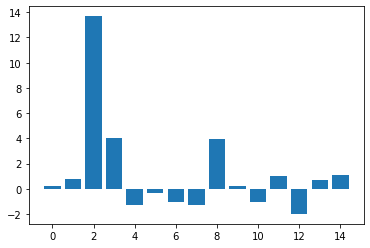

()

In [12]:
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
model = LinearRegression()
model_name= 'Lin_reg'
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

Feature: 0, Score: 0.60306
Feature: 1, Score: 0.20013
Feature: 2, Score: 0.11791
Feature: 3, Score: 0.01349
Feature: 4, Score: 0.00221
Feature: 5, Score: 0.00618
Feature: 6, Score: 0.00606
Feature: 7, Score: 0.00618
Feature: 8, Score: 0.01035
Feature: 9, Score: 0.00726
Feature: 10, Score: 0.00607
Feature: 11, Score: 0.00824
Feature: 12, Score: 0.00338
Feature: 13, Score: 0.00574
Feature: 14, Score: 0.00376


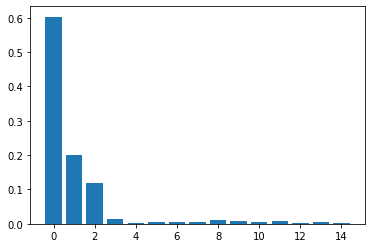

()

In [13]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model_name='Dec_tree_reg'
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importancee
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

Feature: 0, Score: 0.60921
Feature: 1, Score: 0.19484
Feature: 2, Score: 0.11879
Feature: 3, Score: 0.01350
Feature: 4, Score: 0.00402
Feature: 5, Score: 0.00583
Feature: 6, Score: 0.00633
Feature: 7, Score: 0.00585
Feature: 8, Score: 0.00975
Feature: 9, Score: 0.00690
Feature: 10, Score: 0.00558
Feature: 11, Score: 0.00644
Feature: 12, Score: 0.00302
Feature: 13, Score: 0.00597
Feature: 14, Score: 0.00396


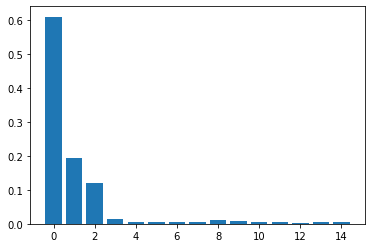

()

In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model_name='Ran_rof_reg'
model.fit(X, y)
# get importance
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

[14:30:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Feature: 0, Score: 0.39800
Feature: 1, Score: 0.22886
Feature: 2, Score: 0.20447
Feature: 3, Score: 0.02682
Feature: 4, Score: 0.01269
Feature: 5, Score: 0.00489
Feature: 6, Score: 0.00856
Feature: 7, Score: 0.01069
Feature: 8, Score: 0.05793
Feature: 9, Score: 0.00818
Feature: 10, Score: 0.00804
Feature: 11, Score: 0.01077
Feature: 12, Score: 0.00896
Feature: 13, Score: 0.00581
Feature: 14, Score: 0.00532


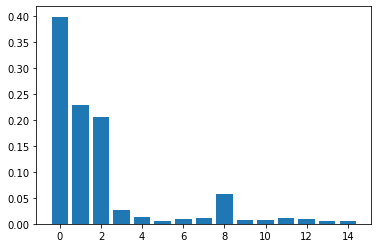

()

In [15]:
from xgboost import XGBRegressor
model = XGBRegressor()
model_name='XGB'
model.fit(X, y)
# get importance
importance = model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
feature_importance(mod=model_name, importance=importance)

In [16]:
# Lets plot the results of models
df_FI = pd.DataFrame({'Models': list(feature_importanc_Regression.keys()),
                          'Most important feature': list(feature_importanc_Regression.values())})
df_FI

,Models,Most important feature
0,Lin_reg,"(2, 13.681976472573236)"
1,Dec_tree_reg,"(0, 0.6030590064514045)"
2,Ran_rof_reg,"(0, 0.6092120070644167)"
3,XGB,"(0, 0.3980045)"


In [17]:
df_FI['Feature']=0
df_FI

,Models,Most important feature,Feature
0,Lin_reg,"(2, 13.681976472573236)",0
1,Dec_tree_reg,"(0, 0.6030590064514045)",0
2,Ran_rof_reg,"(0, 0.6092120070644167)",0
3,XGB,"(0, 0.3980045)",0


In [18]:
for i in [0,1,2,3]:
    a=df_FI['Most important feature'][i][0]
    df_FI['Feature'][i]=a
    print(a)
df_FI

2
0
0
0


C:\Users\User\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Models,Most important feature,Feature
0,Lin_reg,"(2, 13.681976472573236)",2
1,Dec_tree_reg,"(0, 0.6030590064514045)",0
2,Ran_rof_reg,"(0, 0.6092120070644167)",0
3,XGB,"(0, 0.3980045)",0


In [19]:
df_FI['Feature_name']=0

In [20]:
def feature(most,i):
    elig_values = np.where(most[i][0]== 2, 'gender_lab','reading score')
    print(most[i][0])
    return elig_values
for i in [0,1,2,3]:
    df_FI['Feature_name'][i]= feature(df_FI['Most important feature'],i)
df_FI

2
0
0
0


C:\Users\User\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Models,Most important feature,Feature,Feature_name
0,Lin_reg,"(2, 13.681976472573236)",2,gender_lab
1,Dec_tree_reg,"(0, 0.6030590064514045)",0,reading score
2,Ran_rof_reg,"(0, 0.6092120070644167)",0,reading score
3,XGB,"(0, 0.3980045)",0,reading score


In [21]:
df_FI['Importance']=1

In [23]:
for i in [0,1,2,3]:
    a=df_FI['Most important feature'][i][1]
    df_FI.iloc[i,4]=a
    #df_new=df_FI
    print(a)

13.681976472573236
0.6030590064514045
0.6092120070644167
0.3980045


In [24]:
df_FI

,Models,Most important feature,Feature,Feature_name,Importance
0,Lin_reg,"(2, 13.681976472573236)",2,gender_lab,13.681976
1,Dec_tree_reg,"(0, 0.6030590064514045)",0,reading score,0.603059
2,Ran_rof_reg,"(0, 0.6092120070644167)",0,reading score,0.609212
3,XGB,"(0, 0.3980045)",0,reading score,0.398005


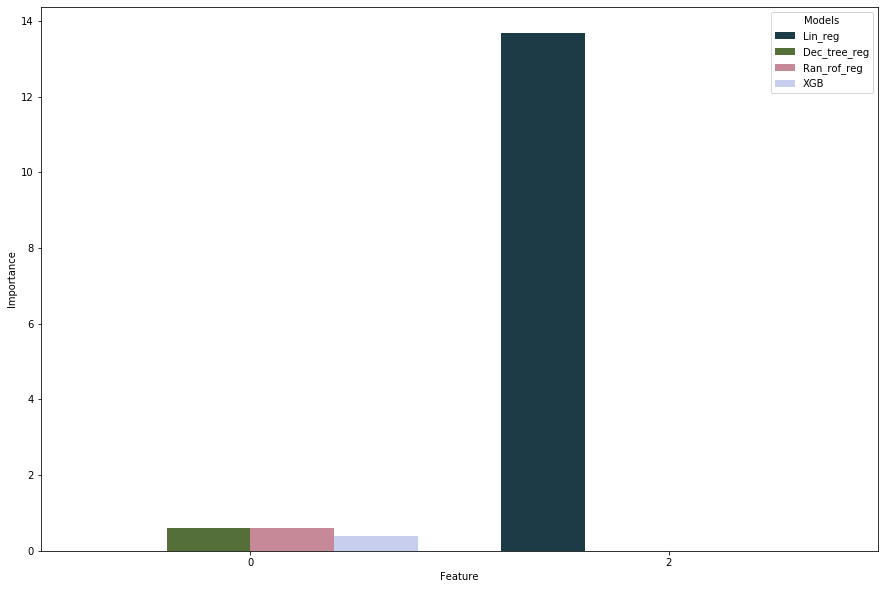

In [25]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax = sns.barplot(x="Feature", y="Importance", data=df_FI, ci=False, hue = 'Models',palette="cubehelix")
